# ITV Step Up Data Challenge: Data Science
Welcome to the ITV Step Up Data Challenge, Data Science part! This is where the real fun begins as you get to work with a dataset that closely resembles the kind of data that we use in the industry to build machine learning models. The goal is to predict the viewing behavior of individual users, which can be used to create personalized advertising and marketing campaigns or show recommendations.

You are going to have an exciting task to work on, which is to figure out who is most likely to watch the new ITVX Original 'A Spy Among Friends', which was released exclusively on ITVX on December 8th, 2022. We have collected data on our viewers for the past three months, which you will use to build a machine learning model that will help us identify potential viewers of the new show. This is a great opportunity for you to put your data science skills to the test and make a real impact on the business. Let's get started and see how accurate your predictions can be!

It's good to have an idea what the show is about before you start exploring the data we have. Maybe this will give you some initial ideas for what sort of behavioural traits could predict whether or not someone watches this show. Here is the [IMDB Link](https://www.imdb.com/title/tt15565872/).

### Before you get started
This notebook is created to give you a taste of what data science is all about. If you're already well-versed in coding and data science, we challenge you to put your skills to the test by creating your own notebook from scratch.

Throughout this notebook, you will find numerous examples of different data science tasks including data exploration, cleaning, feature engineering, and modeling. However, we want to encourage you to take an active role in the learning process by trying to implement something on your own when you see a 'TODO' section. Whether you choose to follow the provided examples or come up with something entirely new, by the end of this notebook, you will have the ability to create a much better model than the baseline model provided. This notebook is an excellent opportunity to gain hands-on experience and learn about the various challenges that come with working with this type of data.

Remember, the internet is your friend. Even the most experienced data scientists are googling how to do something on the daily. This is completely normal, and its how you learn. Go see how others have feature engineered a similar column, bookmark the documentation of python libraries such as [pandas](https://pandas.pydata.org/docs/) and [sklearn](https://scikit-learn.org/stable/getting_started.html), or have a look at how similar problems have been solved over at [Kaggle](https://www.kaggle.com/). The number of possible roads you can go down here is practically limitless, and whatever you end up doing - you'll probably learn something new. It's all about exploration!

Lets get started!

Do Shift+Enter to run the below cells. It might take a minute or so to get started.

In [1]:
# lets import some python libraries that will help us out
import pandas as pd
import numpy as np
import sklearn
import matplotlib

# and do some initial set up
pd.set_option('display.max_columns', 500)

In [2]:
# Lets load in our dataset...
data = pd.read_csv("DIG_step_up_user_data.csv").set_index("user_id")


## Exploring the dataset

Exploring data is important because it helps you understand what the data looks like and what patterns it contains before you start building models or making predictions. It's like taking a sneak peek at your data before you dive into it. By exploring the data, you can identify any potential issues or problems, such as missing values or outliers, that could affect the accuracy of your models. Additionally, exploring the data can also help you gain insights and generate hypotheses that can guide your analysis. Essentially, it's a crucial first step in making sense of your data and ensuring that your analysis is as accurate and meaningful as possible.

In [3]:
# lets first just take a look at it, does it look right? Can you spot anything that seems off?
display(data)

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,top_3_subgenres,age,gender
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
#ERROR!,88,31,71,"['WORLD CUP', 'CORONATION STREET', 'THE MOTORB...","['DRAMA', 'FACTUAL', 'SPORT']",0.000000,44740.836375,14741.881016,21813.686317,3746.000000,15194.383000,7101.018033,69.484000,407.710038,1325.9340,974.732600,20721.626539,16172.921061,54245.059108,9097.180000,68075.810754,23937.696359,8223.279594,10.0,26210.929569,100236.786707,True,"['LONG RUNNING DRAMA', 'FOOTBALL', 'EVENT']",30.0,Other
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=,13,5,7,"['WITHOUT SIN', 'EMMERDALE', 'CORONATION STREET']",['DRAMA'],0.000000,10650.877000,0.000000,0.000000,0.000000,0.000000,908.952400,0.000000,0.000000,0.0000,0.000000,0.000000,7309.580000,3341.297000,0.000000,10650.877000,0.000000,0.000000,1.0,1561.353000,10650.877000,True,"['CRIME AND THRILLER', 'LONG RUNNING DRAMA', '...",33.0,Female
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=,26,7,15,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...","['ENTERTAINMENT', 'SPORT', 'DRAMA']",65.067783,12189.135000,11231.665042,29174.257096,0.000000,0.000000,4269.113322,673.814170,0.000000,0.0000,0.000000,0.000000,0.000000,39088.831854,13571.293067,52660.124921,0.000000,0.000000,1.0,7201.881194,52660.124921,True,"['FOOTBALL', 'EVENT', 'CELEBRITY']",33.0,Male
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=,39,8,22,"['A SPY AMONG FRIENDS', 'A CONFESSION', 'WITHO...","['DRAMA', 'ENTERTAINMENT', 'OTHER']",0.000000,78194.430000,286.353538,0.000000,4.658504,0.000000,1132.379704,0.000000,2431.011800,0.0000,0.000000,3012.440538,13933.152504,36104.811000,25435.038000,78485.442042,0.000000,0.000000,2.0,0.000000,78485.442042,True,"['CRIME AND THRILLER', 'BASED ON A TRUE STORY'...",36.0,Prefer not to answer
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=,67,18,47,"['WORLD CUP', 'FEARLESS', 'THE WALK-IN']","['SPORT', 'ENTERTAINMENT', 'DRAMA']",0.000000,17670.600000,11802.851738,144107.089606,0.000000,3408.626000,17672.755734,0.000000,0.000000,0.0000,0.000000,18512.082654,25081.574436,108080.543233,25314.967021,NaN,0.000000,0.000000,1.0,70648.591664,176989.167344,True,"['FOOTBALL', 'EVENT', 'CRIME AND THRILLER']",32.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zg9fzXtMG4auh6OAIgjr8syJkEv7UJm7L9tvvEbOYuY=,19,10,18,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...","['SPORT', 'DRAMA', 'ENTERTAINMENT']",0.000000,18113.978000,6554.567016,13111.289457,0.000000,0.000000,3335.115277,0.000000,45.422200,0.0000,298.452570,0.000000,8565.651511,15990.761959,13223.421003,37779.834473,0.000000,0.000000,2.0,6806.115833,37779.834473,True,"['FOOTBALL', 'EVENT', 'CELEBRITY']",33.0,Male
zkr6KprLNGHxaRrHPGs/vqgYEKetsunUyW+H7FXlgK4=,27,2,12,"[""I'M A CELEBRITY... GET ME OUT OF HERE!"", 'GO...",['ENTERTAINMENT'],0.000000,0.000000,22751.175730,0.000000,0.000000,0.000000,2275.117573,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,5612.700000,NaN,22751.175730,0.000000,0.000000,1.0,507.486000,22751.175730,False,"['CELEBRITY', 'FACTUAL', 'TRAVEL']",40.0,Male
zoIyf1raNu8xfnF51ICqjJhiDDwmD1

It's important to thoroughly investigate any unusual observations you may come across during the data exploration process. By doing so, you can make informed decisions on whether to remove certain rows or columns that may be affecting the accuracy of your analysis.

Lets look at some statistics on the columns

In [4]:
# for quick statistics you can use the pandas describe method
#   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

data.describe()

,n_sessions,n_programmes_watched,n_episodes_watched,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,age
count,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1640.000000,1.698000e+03,1771.000000,1771.000000,1745.000000,1771.000000,1.676000e+03,1658.000000
mean,29.957651,7.020327,20.217956,725.233787,25707.076022,9988.012809,5504.614528,2463.992048,1364.314099,2774.015108,245.599083,688.586986,110.354623,96.918923,4742.140506,8407.816354,19774.847978,13208.899978,4.330568e+04,1606.325537,1191.880807,1.449857,13468.638911,4.559467e+04,34.939083
std,52.824300,9.913618,35.352717,8587.747771,61589.113734,28042.098335,18455.430161,9082.034712,5368.058386,5481.123583,1407.013797,3556.378598,564.122317,680.991461,14771.746991,20208.505499,36174.218977,37878.744458,8.400279e+04,12708.627053,8397.316785,0.701351,25705.344395,8.213161e+04,5.074630
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,2.340000e-01,18.000000
25%,4.000000,2.000000,4.000000,0.000000,182.433568,0.000000,0.000000,0.000000,0.000000,153.672501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1459.393402,0.000000,2.906464e+03,0.000000,0.000000,1.000000,103.077915,5.332510e+03,32.000000
50%,12.000000,4.000000,8.000000,0.000000,6782.458000,324.627000,0.000000,0.000000,0.000000,892.577800,0.000000,0.000000,0.000000,0.000000,0.000000,1025.365000,6943.563000,3335.135500,1.466602e+04,0.000000,0.000000,1.000000,4694.704000,1.743006e+04,35.000000
75%,32.500000,8.000000,21.000000,0.000000,25035.219000,7437.641768,1649.630162,292.404000,9.376127,2906.994168,39.433400,4.369248,0.000000,0.000000,2805.061500,7178.964769,22215.852458,11922.773000,4.397354e+04,0.000000,0.000000,2.000000,14555.852438,4.754841e+04,38.000000
max,686.000000,111.000000,407.000000,330652.936092,968471.926790,425848.615310,228739.002166,153076.992654,89798.864367,54950.357207,49007.474514,68428.973092,8918.698256,14704.998240,189202.347000,332942.251944,446846.432941,774244.753000,1.016244e+06,468060.331391,190693.607924,10.000000,279514.865511,1.016244e+06,50.000000


In [5]:
# for categorical variables:
data.describe(include="object")

,top_3_programmes,top_3_genres,top_3_subgenres,gender
count,1771,1745,1771,1691
unique,1340,107,782,4
top,['A SPY AMONG FRIENDS'],['DRAMA'],['CRIME AND THRILLER'],Male
freq,99,336,130,671


Plotting data is a helpful tool for data exploration because it allows you to visualize the distribution and patterns in the data in a way that is easy to understand. With a visual representation of the data, you can quickly identify trends, outliers, and any other interesting features of the data that might not be immediately apparent from looking at the raw data. Additionally, different types of plots are useful for different kinds of data and questions, for example, a scatter plot for relationship between two continuous variables, or a histogram for distribution of continuous data.

<AxesSubplot:xlabel='n_episodes_watched', ylabel='Frequency'>

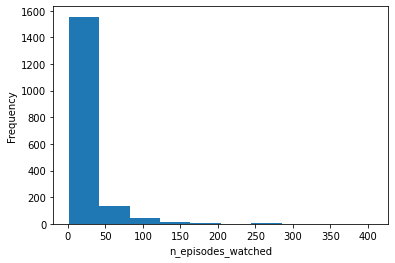

In [6]:
# you can plot any variable using the pandas dataframe plot method: 
#     https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
# here are some examples:
column_to_plot = "n_episodes_watched"
example_plot_1 = data[column_to_plot].plot(kind="hist")  # histogram of a numerical column
example_plot_1.set_xlabel(column_to_plot)

example_plot_1

<AxesSubplot:xlabel='gender'>

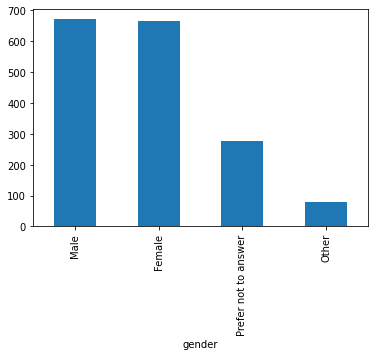

In [7]:
# for categorical columns, we might want to make a bar chart
column_to_plot = "gender"
example_plot_2 = data['gender'].value_counts().plot(kind='bar')
example_plot_2.set_xlabel(column_to_plot)

example_plot_2 

<AxesSubplot:ylabel='any_spy_among_friends_consumption'>

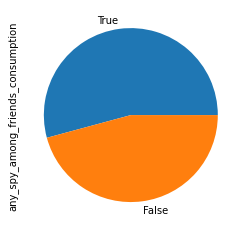

In [8]:
# ... or a pie chart
data["any_spy_among_friends_consumption"].value_counts().plot(kind="pie")

This is actually our target variable (`any_spy_among_friends_consumption`), and we can see about half of our users have watched A Spy Among Friends

<AxesSubplot:xlabel='n_programmes_watched', ylabel='total_consumption_seconds'>

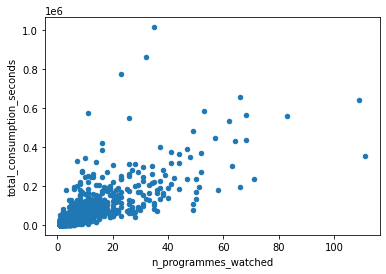

In [9]:
# here we're plotting the total consumption seconds by number of programmes watched, we should expect a linar relationship
data[["n_programmes_watched", "total_consumption_seconds"]].plot(kind="scatter", x="n_programmes_watched", y="total_consumption_seconds")

Ask yourself questions such as: Does the data have an acceptable distribution? Are there any extreme data points that appear abnormal? How can these be handled to improve the integrity of the analysis?

In [10]:
# TODO: plot and explore the other feature columns in the data

# Feature Engineering

Feature engineering is the process of using domain knowledge to create additional features (or variables) from the raw data that can be used to improve the performance of a model. It's like taking the raw data and making it more useful by creating new information from it. For example, if you are trying to predict the price of a house, instead of just using the number of bedrooms, you could create a new feature that calculates the number of bedrooms per square foot. The new feature captures the information in a more useful form and can help the model make more accurate predictions.

[Read more about this here](https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10).

When working with a machine learning model, it is important to consider the format of the input data. One common issue that arises is when dealing with categorical variables in string format. These variables may contain a large number of unique labels, making it difficult for the model to effectively process and utilize the information. To mitigate this, a common technique is to perform feature engineering on the categorical variable by reducing the number of unique labels.

In [11]:
data["top_3_genres"].value_counts()

['DRAMA']                                336
['ENTERTAINMENT']                        141
['DRAMA', 'ENTERTAINMENT']               118
['DRAMA', 'ENTERTAINMENT', 'FACTUAL']     65
['DRAMA', 'ENTERTAINMENT', 'SPORT']       62
                                        ... 
['FACTUAL', 'SPORT', 'OTHER']              1
['COMEDY', 'OTHER']                        1
['OTHER', 'DRAMA', 'FACTUAL']              1
['FACTUAL', 'OTHER', 'DRAMA']              1
['COMEDY', 'ENTERTAINMENT', 'OTHER']       1
Name: top_3_genres, Length: 107, dtype: int64

In [12]:
# we can for example extract what the top genre was
data["top_genre_1"] = data["top_3_genres"].transform(lambda x: eval(x)[0] if x is not np.nan else np.nan)
display(data[["top_3_genres", "top_genre_1"]])

,top_3_genres,top_genre_1
user_id,,
#ERROR!,"['DRAMA', 'FACTUAL', 'SPORT']",DRAMA
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=,['DRAMA'],DRAMA
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=,"['ENTERTAINMENT', 'SPORT', 'DRAMA']",ENTERTAINMENT
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=,"['DRAMA', 'ENTERTAINMENT', 'OTHER']",DRAMA
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=,"['SPORT', 'ENTERTAINMENT', 'DRAMA']",SPORT
...,...,...
zg9fzXtMG4auh6OAIgjr8syJkEv7UJm7L9tvvEbOYuY=,"['SPORT', 'DRAMA', 'ENTERTAINMENT']",SPORT
zkr6KprLNGHxaRrHPGs/vqgYEKetsunUyW+H7FXlgK4=,['ENTERTAINMENT'],ENTERTAINMENT
zoIyf1raNu8xfnF51ICqjJhiDDwmD1NIbXw3l65xSyo=,"['ENTERTAINMENT', 'DRAMA', 'SPORT']",ENTERTAINMENT


<AxesSubplot:>

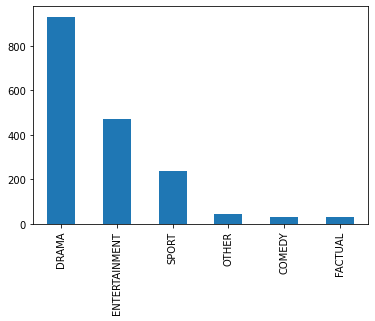

In [13]:
# now we have only 6 unique values
data["top_genre_1"].value_counts().plot(kind="bar")

We can combine two columns to get a new metric. For example, we can divide `total_consumption_seconds` by `n_sessions`, to get the average number of seconds per session.

In [14]:
data["mean_session_duration_seconds"] = data["total_consumption_seconds"] / data["n_sessions"]
display(data[["total_consumption_seconds", "n_sessions", "mean_session_duration_seconds"]])

,total_consumption_seconds,n_sessions,mean_session_duration_seconds
user_id,,,
#ERROR!,100236.786707,88,1139.054394
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=,10650.877000,13,819.298231
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=,52660.124921,26,2025.389420
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=,78485.442042,39,2012.447232
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=,176989.167344,67,2641.629363
...,...,...,...
zg9fzXtMG4auh6OAIgjr8syJkEv7UJm7L9tvvEbOYuY=,37779.834473,19,1988.412341
zkr6KprLNGHxaRrHPGs/vqgYEKetsunUyW+H7FXlgK4=,22751.175730,27,842.636138
zoIyf1raNu8xfnF51ICqjJhiDDwmD1NIbXw3l65xSyo=,56815.310210,61,931.398528


What are some effective methods for extracting meaningful insights from the columns of data? Do you see more opportunities to create new features by combining information from multiple columns? 

In [15]:
# TODO: perform some feature engineering yourself! 

## Data Cleaning
Data cleaning is the process of preparing data for analysis by removing or correcting errors, inconsistencies, and missing values. It is important to ensure accuracy of analysis and predictions. Examples include removing duplicate rows, fixing spelling mistakes, filling in missing values, and converting data into the correct format.

For example, removing missing values is important because many machine learning algorithms cannot handle missing values and will either produce an error or produce biased results. Additionally, missing values can skew statistical analyses and make it difficult to draw accurate conclusions from the data. Removing them can help to improve the accuracy and reliability of the results.

In [16]:
# by making a copy of the dataset, instead of overwriting it, we can easily go back and look at the original data as we work
data_cleaned = data.copy()

Lets see how many missing values we have

In [17]:
# checking for missing values
data_cleaned.isnull().sum()

n_sessions                                         0
n_programmes_watched                               0
n_episodes_watched                                 0
top_3_programmes                                   0
top_3_genres                                      26
total_genre_comedy_consumption_seconds             0
total_genre_drama_consumption_seconds              0
total_genre_entertainment_consumption_seconds      0
total_genre_sport_consumption_seconds              0
total_genre_other_consumption_seconds              0
total_genre_factual_consumption_seconds            0
total_channel_ITV_consumption_seconds              0
total_channel_ITV2_consumption_seconds             0
total_channel_ITV3_consumption_seconds             0
total_channel_ITVBe_consumption_seconds            0
total_channel_ITV4_consumption_seconds             0
total_watch_morning_consumption_seconds            0
total_watch_afternoon_consumption_seconds          0
total_watch_dinner_consumption_seconds        

There are a few columns in this dataset that contain missing values. One approach to handling missing data is to simply drop all rows that have any missing values. However, this can result in a significant loss of data, which can negatively impact the accuracy of the analysis.
Another approach is to attempt to replace the missing values with an estimate of what the value is likely to be.
For categorical variables such as top_genre_1, we might use the mode (most common value) of that column to fill in missing values.
For continuous variables, we might use the mean or median of that column to replace the missing values. Additionally, there are more advanced strategies such as using machine learning algorithms to predict missing values, which can be more accurate. It is important to consider the specific characteristics of the dataset and the goals of the analysis when deciding on the best approach for handling missing values.

You can see a few approaches in this [article](https://towardsdatascience.com/handling-missing-values-with-pandas-b876bf6f008f).

In [18]:
# in the top_genre_1 column we have a few missing values
data["top_genre_1"].isna().sum()

26

In [19]:
# As an example, below we are replacing missing values in top_genre_1 with 'DRAAMA' because most people in our dataset are male.
# to replace missing values, we'll use the pandas fillna method
#   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

fill_na_definition = {"top_genre_1": "DRAMA"}

data_cleaned.fillna(fill_na_definition, inplace=True)

print("\n Now - Number of missing values in top_genre_1 column: " + str(data_cleaned["top_genre_1"].isnull().sum()))


 Now - Number of missing values in top_genre_1 column: 0


In [20]:
# here we are imputing the mean_session_duration_seconds and total_genre_drama_consumption_seconds columns with the average
# we're also replacing total_consumption_seconds with the mode
avg_mean_session_duration_seconds = data_cleaned["mean_session_duration_seconds"].mean()
avg_drama_genre_consumption_seconds = data_cleaned["total_genre_drama_consumption_seconds"].mean()
avg_total_consumption_seconds = data_cleaned["total_consumption_seconds"].mode()


fill_na_definition = {"mean_session_duration_seconds": avg_mean_session_duration_seconds, 
                      "total_genre_drama_consumption_seconds": avg_drama_genre_consumption_seconds, 
                      "total_consumption_seconds": avg_total_consumption_seconds
}

data_cleaned.fillna(fill_na_definition, inplace=True)

print("\n Now - Number of missing values in mean_session_duration_seconds column: " + str(data_cleaned["mean_session_duration_seconds"].isnull().sum()))


 Now - Number of missing values in mean_session_duration_seconds column: 0


Clean up the entire dataset to retain as much data as possible. This is important because more data means a better-performing model. However, it's important to be cautious and avoid making too many assumptions when cleaning the data. If the dataset becomes too far removed from reality, the model's performance will suffer when it encounters new data. Feel free to experiment with different columns and techniques to see how they affect the data.

In [21]:
# TODO: impute missing values on the other columns

Its not always possible to replace all missing values, so to delete the rows with missing values you can do this:

In [22]:
data_cleaned.dropna(inplace=True)
print("Are there any missing?:", data_cleaned.isna().sum().any())

Are there any missing?: False


## Encoding

Variable encoding is the process of converting categorical variables, which are variables that can take on a limited number of values, into numerical variables that can be used by machine learning algorithms. This is necessary because most machine learning algorithms only work with numerical data, and cannot directly process categorical data.
There are several different ways to encode categorical variables, such as one-hot encoding, label encoding, and binary encoding. Each encoding method has its own advantages and disadvantages, and the choice of which method to use depends on the specific characteristics of the dataset and the goals of the analysis. For example, One-hot encoding creates a new binary column for each unique category and assigns a 1 or 0 in each observation for the presence or absence of that category. Label encoding assigns a unique integer value to each category.
It is important to encode categorical variables correctly in order to ensure that the data is properly represented and that the machine learning model can make accurate predictions.

In [23]:
data_encoded = data_cleaned.copy()

In [24]:
# Lets first look at our target variable - this is what we're trying to predict
target_column = "any_spy_among_friends_consumption"

data_encoded[target_column]

user_id
#ERROR!                                          True
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=     True
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=     True
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=     True
+DYiONWpxJsu8TOV/jnMqVPnnrO2QAPQllNm/qra2Sc=     True
                                                ...  
zckAR1ZYm1wK61wD/YXsEIj/sODRQlLEzHUDremB6CA=    False
zeZ6SKiQEpwFORqdSrwPjUgpDQtIVIPaVg9y/Y90iX4=     True
zg9fzXtMG4auh6OAIgjr8syJkEv7UJm7L9tvvEbOYuY=     True
zoIyf1raNu8xfnF51ICqjJhiDDwmD1NIbXw3l65xSyo=    False
zyikXJ6pnium8X6j2AB/pBDdU6UEQZfMQi0ncOMjgAw=    False
Name: any_spy_among_friends_consumption, Length: 1314, dtype: bool

This is a boolean data type: the value is either True or False.
To create a machine learning model, it might be easier to have this as a numerical value, lets convert the column to integer type instead to get 0s and 1s.

In [25]:
data_encoded[target_column] = data_encoded[target_column].astype(int)
display(data_encoded[target_column])

user_id
#ERROR!                                         1
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=    1
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=    1
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=    1
+DYiONWpxJsu8TOV/jnMqVPnnrO2QAPQllNm/qra2Sc=    1
                                               ..
zckAR1ZYm1wK61wD/YXsEIj/sODRQlLEzHUDremB6CA=    0
zeZ6SKiQEpwFORqdSrwPjUgpDQtIVIPaVg9y/Y90iX4=    1
zg9fzXtMG4auh6OAIgjr8syJkEv7UJm7L9tvvEbOYuY=    1
zoIyf1raNu8xfnF51ICqjJhiDDwmD1NIbXw3l65xSyo=    0
zyikXJ6pnium8X6j2AB/pBDdU6UEQZfMQi0ncOMjgAw=    0
Name: any_spy_among_friends_consumption, Length: 1314, dtype: int64

The get_dummies method in the pandas library is used to convert categorical variables into numerical variables, specifically by creating a new binary column for each unique category and assigning a 1 or 0 in each observation for the presence or absence of that category. This is also known as one-hot encoding. [Read more here](https://datagy.io/pandas-get-dummies/)

In [26]:
# dummy encoding:
data_encoded = pd.get_dummies(data=data_encoded, columns=["top_genre_1"])

display(data_encoded)

# go have a look at the last columns which were just added. They are all binary!

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,top_3_subgenres,age,gender,mean_session_duration_seconds,top_genre_1_COMEDY,top_genre_1_DRAMA,top_genre_1_ENTERTAINMENT,top_genre_1_FACTUAL,top_genre_1_OTHER,top_genre_1_SPORT
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
#ERROR!,88,31,71,"['WORLD CUP', 'CORONATION STREET', 'THE MOTORB...","['DRAMA', 'FACTUAL', 'SPORT']",0.000000,44740.836375,14741.881016,21813.686317,3746.000000,15194.383000,7101.018033,69.48400,407.710038,1325.9340,974.732600,20721.626539,16172.921061,54245.059108,9097.180000,68075.810754,23937.696359,8223.279594,10.0,26210.929569,100236.786707,1,"['LONG RUNNING DRAMA', 'FOOTBALL', 'EVENT']",30.0,Other,1139.054394,0,1,0,0,0,0
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=,13,5,7,"['WITHOUT SIN', 'EMMERDALE', 'CORONATION STREET']",['DRAMA'],0.000000,10650.877000,0.000000,0.000000,0.000000,0.000000,908.952400,0.00000,0.000000,0.0000,0.000000,0.000000,7309.580000,3341.297000,0.000000,10650.877000,0.000000,0.000000,1.0,1561.353000,10650.877000,1,"['CRIME AND THRILLER', 'LONG RUNNING DRAMA', '...",33.0,Female,819.298231,0,1,0,0,0,0
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=,26,7,15,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...","['ENTERTAINMENT', 'SPORT', 'DRAMA']",65.067783,12189.135000,11231.665042,29174.257096,0.000000,0.000000,4269.113322,673.81417,0.000000,0.0000,0.000000,0.000000,0.000000,39088.831854,13571.293067,52660.124921,0.000000,0.000000,1.0,7201.881194,52660.124921,1,"['FOOTBALL', 'EVENT', 'CELEBRITY']",33.0,Male,2025.389420,0,0,1,0,0,0
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=,39,8,22,"['A SPY AMONG FRIENDS', 'A CONFESSION', 'WITHO...","['DRAMA', 'ENTERTAINMENT', 'OTHER']",0.000000,78194.430000,286.353538,0.000000,4.658504,0.000000,1132.379704,0.00000,2431.011800,0.0000,0.000000,3012.440538,13933.152504,36104.811000,25435.038000,78485.442042,0.000000,0.000000,2.0,0.000000,78485.442042,1,"['CRIME AND THRILLER', 'BASED ON A TRUE STORY'...",36.0,Prefer not to answer,2012.447232,0,1,0,0,0,0
+DYiONWpxJsu8TOV/jnMqVPnnrO2QAPQllNm/qra2Sc=,231,40,118,"[""AGATHA CHRISTIE'S POIROT"", 'LEWIS', 'MIDSOME...","['DRAMA', 'OTHER', 'FACTUAL']",0.000000,161906.933911,2.870457,0.000000,24094.243000,2985.306000,1795.097746,389.63590,13556.548891,774.4517,0.000000,0.000000,407.954000,17486.552457,171094.846911,188989.353368,0.000000,0.000000,1.0,68043.454457,188989.353368,1,"['CRIME AND THRILLER', 'PERIOD AND HISTORICAL'...",39.0,Male,818.135729,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zckAR1ZYm1wK61wD/YXsEIj/sODRQlLEzHUDremB6CA=,12,5,8,"['WORLD CUP', 'TIPPING POINT', 'EMMERDALE']","['SPORT', 'ENTERTAINMENT', 'DRAMA']",0.000000,0.000000,1213.813095,788.990415,0.000000,0.000000,74.052250,118.28100,0.000000,0.0000,7.947101,0.000000,0.000000,819.993510,1182.810000,0.000000,2002.803510,0.000000,1.0,113.742169,2002.803510,0,"['FOOTBALL', 'EVENT', 'QUIZ AND GAME SHOWS']",36.0,Male,166.900293,0,0,0,0,0,1
zeZ6SKiQEpwFORqdSrwPjUgpDQtIVIPaVg9y/Y90iX4=,18,5,10,"['A CONFESSION', 'A SPY AMONG FRIENDS', 'CENTR

In [27]:
# TODO: encode any other categorical columns youd like to include in the model

## Standardising
Another important aspect to think about is whether each row of data is comparable. Take for example  `total_genre_drama_consumption_seconds`. 

In [28]:
data_standardised = data_encoded.copy()

In [29]:
data_standardised[["total_genre_drama_consumption_seconds", "total_consumption_seconds", "n_sessions"]].iloc[3:6]

,total_genre_drama_consumption_seconds,total_consumption_seconds,n_sessions
user_id,,,
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=,78194.430000,78485.442042,39
+DYiONWpxJsu8TOV/jnMqVPnnrO2QAPQllNm/qra2Sc=,161906.933911,188989.353368,231
+Ni+NSzcfeaq/mjIME1uPYPbSt0xKnF5KaSHtJyKmGU=,15056.885000,15770.637000,7


If the model takes the `total_genre_drama_consumption_seconds` as a feature, its going to assume the last user watches a whole lot more of the drama genre than the other two. But if take into consideration the total consumption of those users, actually user 3 also _in general_ watches more ITV content than the other two users. They have many more viewing sessions too. Standardizing columns can also help to identify and handle outliers, as values that are far from the mean will be more apparent after standardization.

As humans, we can see this relationship. But it might not be so easy to understand it for the model. Its therefore best practice to standardise the features to be directly comparable between users. We can do a simple division to achieve this, dividing for example by `total_consumption_seconds` to get the percent of viewing that is of that genre.

In [30]:
data_standardised["prop_genre_drama_consumption"] = data_standardised["total_genre_drama_consumption_seconds"] / data_standardised["total_consumption_seconds"]

data_standardised[["total_genre_drama_consumption_seconds", "total_consumption_seconds", "n_sessions", "prop_genre_drama_consumption"]].iloc[3:6]



,total_genre_drama_consumption_seconds,total_consumption_seconds,n_sessions,prop_genre_drama_consumption
user_id,,,,
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=,78194.430000,78485.442042,39,0.996292
+DYiONWpxJsu8TOV/jnMqVPnnrO2QAPQllNm/qra2Sc=,161906.933911,188989.353368,231,0.856699
+Ni+NSzcfeaq/mjIME1uPYPbSt0xKnF5KaSHtJyKmGU=,15056.885000,15770.637000,7,0.954742


Look at the last column: its painting a very different picture. And this the model can understand.

In [31]:
# TODO: look through the other columns and standardise

We've now got a dataset ready for modelling!

# Train Test Split
Splitting your data into training and testing sets is a crucial step in data science. It allows you to train your model on a portion of the data and then test its accuracy on a separate, unseen portion. This is important because it helps prevent overfitting, where a model becomes too specialized to the training data and performs poorly on new, unseen data. By reserving a portion of the data for testing, we can evaluate the model's ability to generalize to new data and ensure its performance is robust.

In [32]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data_standardised, test_size=0.3, random_state=20)

print(train_data.shape, test_data.shape)

(919, 38) (395, 38)


This split will be bigger if you've done a better job at imputing missing variables.

Something to think about: should we do the train test split before or after we replaced missing values?
    _(hint: have a google of the term `data leakage`)_

# Modelling
There are many different algorithms for building machine learning models. These algorithms vary in their complexity and the types of problems they are best suited for. Some of the most commonly used machine learning algorithms include:
* Linear Regression: This is a simple algorithm that is used for predicting numerical values based on a linear relationship between the input and output variables.

* Logistic Regression: This is another simple algorithm that is used for predicting binary outcomes, such as whether an email is spam or not.

* Decision Trees: This algorithm creates a tree-like model of decisions and their possible consequences. It can be used for both classification and regression problems.

* Random Forest: This is an ensemble method that combines multiple decision trees to improve the model's performance.

* Gradient Boosting: This is another ensemble method that improves the performance of the model by iteratively adding new models to the ensemble.

These are just a few examples of the many different machine learning algorithms that exist. The choice of algorithm will depend on the specific problem and the characteristics of the data.

In this example below, we'll be using just the subset of data we've cleaned and encoded, and a simple decision tree model.

In [33]:
# defining the features we want to input into the model
feature_columns = ["n_sessions", 'prop_genre_drama_consumption', 'total_consumption_seconds', 'mean_session_duration_seconds', "top_genre_1_COMEDY", "top_genre_1_DRAMA", "top_genre_1_ENTERTAINMENT", "top_genre_1_FACTUAL", "top_genre_1_OTHER","top_genre_1_SPORT"]

X_train, y_train, X_test, y_test = train_data[feature_columns], train_data[target_column], test_data[feature_columns], test_data[target_column]

display(X_train)
display(y_train)

,n_sessions,prop_genre_drama_consumption,total_consumption_seconds,mean_session_duration_seconds,top_genre_1_COMEDY,top_genre_1_DRAMA,top_genre_1_ENTERTAINMENT,top_genre_1_FACTUAL,top_genre_1_OTHER,top_genre_1_SPORT
user_id,,,,,,,,,,
ww4afyyowJPaT+sK4WgCh++YpjBo5WQIheK4nMafsEw=,5,0.866077,7806.802000,1561.360400,0,1,0,0,0,0
v+skUO8umjdzRGS5ohF2MygBsSV2JnV4rxtyH/iTUdY=,8,0.845535,10594.850000,1324.356250,0,1,0,0,0,0
IwDefMqzgRnmWzOgsL+Ef+kC1X6t07Oq61otuldJwPo=,2,0.000000,2905.855613,1452.927807,0,0,1,0,0,0
TWRYKQ9wWK+jMJsRlXHFBl+jL8o+6u8jKpeoQKRTxj0=,6,1.000000,11483.840000,1913.973333,0,1,0,0,0,0
uUgbSjvKGavvNI3hAvZtXIU2gIV30KybnFO5oQTWf2k=,2,0.000000,2197.065000,1098.532500,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
w1uUrVfqgCB9nPx/lo59yP9GgsjqIU9dGwT7uRYX9To=,11,0.000040,5584.106247,507.646022,0,0,0,0,0,1
h8KG9FTdP1rDvQCXOYJKSr2tZfUjm9OziFS/vMsJhdI=,16,0.591622,37782.564326,2361.410270,0,1,0,0,0,0
wEShUf9ehFjVmikkXT97zQSBaUcBlB/m5Bmb9WfuCIY=,12,0.567683,21352.225000,1779.352083,0,0,0,1,0,0


user_id
ww4afyyowJPaT+sK4WgCh++YpjBo5WQIheK4nMafsEw=    1
v+skUO8umjdzRGS5ohF2MygBsSV2JnV4rxtyH/iTUdY=    1
IwDefMqzgRnmWzOgsL+Ef+kC1X6t07Oq61otuldJwPo=    0
TWRYKQ9wWK+jMJsRlXHFBl+jL8o+6u8jKpeoQKRTxj0=    0
uUgbSjvKGavvNI3hAvZtXIU2gIV30KybnFO5oQTWf2k=    0
                                               ..
w1uUrVfqgCB9nPx/lo59yP9GgsjqIU9dGwT7uRYX9To=    0
h8KG9FTdP1rDvQCXOYJKSr2tZfUjm9OziFS/vMsJhdI=    1
wEShUf9ehFjVmikkXT97zQSBaUcBlB/m5Bmb9WfuCIY=    1
DIo4EbQk/NOA99y9zEE34fA+YlrEjv/a/WC1LO3yI+I=    1
NPricE6dKR2jmGAvTaPVVij5BfWgErnZ6dRP+CD+NkQ=    0
Name: any_spy_among_friends_consumption, Length: 919, dtype: int64

In [34]:
# lets see what performance we can get with a simple decision tree
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier(random_state=200)
treemodel.fit(X_train,y_train)
predictions = treemodel.predict(X_test)

Lets see how well the model did. Below we are looking at a few key metrics, accuracy, precision, recall, and f1 score

In [35]:
# evaluating
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       187
           1       0.72      0.73      0.73       208

    accuracy                           0.71       395
   macro avg       0.71      0.71      0.71       395
weighted avg       0.71      0.71      0.71       395



An accuracy of 0.71 means that the model correctly predicts the outcome 74% of the time. However, precision and recall are different metrics that measure different aspects of a model's performance.

Precision is a measure of how many of the positive predictions made by the model are actually correct. A precision of 0.77 means that out of all the times the model predicted a positive outcome, only 77% of those predictions were correct.

Recall is a measure of how many of the actual positive outcomes the model was able to correctly identify. A recall of 0.74 means that the model was only able to identify 74% of the actual positive outcomes.

In general, a high precision means that the model is good at not making false positive predictions, while a high recall means that the model is good at finding all the positive outcomes. Depending on the specific use case, a balance between precision and recall may be needed, and trade-offs between the two may be necessary.

[read more here](https://medium.com/@yashwant140393/the-3-pillars-of-binary-classification-accuracy-precision-recall-d2da3d09f664)

In [36]:
pd.crosstab(y_test, predictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,128,59
1,56,152


Our model identified alot of viewers as A Spy Among Friends viewers but also missed a few. It also incorrectly identified some users as A Spy Among Friends viewers when they were not. This raises important questions about the consequences of using this model in a real-world scenario. For example, is it a significant issue if many people are falsely predicted to be in our target group? Additionally, we should consider the impact of the model missing out on a significant number of potential viewers.


You're going to be creating at least 3 different models, each using a different algorithm. This will give you a chance to see how each algorithm performs and which one gives you the best results. Some popular algorithms to try out include Decision Tree, Random Forest, and XGBoost.

When creating your models, it's important to pay attention to the features you include. The features you choose can have a big impact on how well your model performs. Make sure to only include the attributes that are most relevant to the problem you're trying to solve.

Also, don't forget to have fun with it! Machine learning is a great way to learn about data and gain valuable insights. Have a great time experimenting.

Here are some articles to get you started:
- [Decision Tree Tutorial](https://adityagoel123.medium.com/binary-classification-using-decision-tree-model-c4e20c8a5afb)
- [Random Forest Classifier Tutorial](https://pub.towardsai.net/random-forest-for-binary-classification-hands-on-with-scikit-learn-4909e29c29f5)
- [XGBoost Tutorial](https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/)

In [37]:
# TODO: Do some more modelling!

Now it's time to take your findings to the marketing team and provide them with a recommendation. They would like to use your model to target specific users with a email promoting A Spy Among Friends. The business is going to have some follow-up questions for you, so be prepared to provide insightful answers. Here are some key questions to think about:
* Out of the three models, which one performed the best?
* Which features played the most significant role in determining whether or not someone was a viewer?
* Are there any additional data points that could be collected to enhance the model's performance?
* Can you explain, in your own words, how each of these models work and their underlying mechanisms? Remember to do some research first to deepen your understanding.

Write your answer either in a seperate document or within the notebook. Be creative and use whatever format you'd like  - for example, it might be easier for you to stick to making graphs in the notebook and then exporting them to a powerpoint to add comments.

Hint: For a good stakeholder presentation - it is important to include visualisations and key metrics.

In [38]:
# TODO: Present your findings back to the stakeholders